In [1]:
import os
import ast
import faiss
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sentence_transformers import SentenceTransformer

pd.set_option("display.width", None)

DATA_DIR = "data"

In [2]:
def safe_literal_eval(x, col):
    try:
        return ast.literal_eval(x)
    except:
        return dict() if col == "main_objects" else []

In [3]:
df = pd.read_csv(os.path.join(DATA_DIR, "paintings_v2.csv"))
lit_columns = [
    "style_tags",
    "theme_tags",
    "main_objects",
    "other_objects",
    "movement",
]

In [4]:
for col in lit_columns:
    df[col] = df[col].apply(lambda x: safe_literal_eval(x, col))
print(df.shape)

(2546, 17)


In [5]:
df.columns

Index(['title', 'artist_display', 'date_display', 'date_start', 'date_end',
       'medium', 'image_id', 'url', 'intro', 'overview', 'style', 'style_tags',
       'theme', 'theme_tags', 'main_objects', 'other_objects', 'movement'],
      dtype='object')

In [6]:
df.head(5)

,title,artist_display,date_display,date_start,date_end,medium,image_id,url,intro,overview,style,style_tags,theme,theme_tags,main_objects,other_objects,movement
0,An Old Woman Dozing over a Book,"Nicolaes Maes (Dutch, 1634-1693)",c. 1655,1655.0,1655.0,Oil on canvas,NGA-c5f5cfa6-6150-435a-bf5d-a0a7a55c52f7,https://api.nga.gov/iiif/c5f5cfa6-6150-435a-bf...,"A serene portrayal of repose, the subject succ...",The artwork captures a domestic scene featurin...,This painting exhibits characteristics of Dutc...,"[Dutch Golden Age, Realism, Chiaroscuro, Genre...",The theme of this artwork is the portrayal of ...,"[Everyday Life, Aging, Rest, Domestic Scene, L...",{'Old Woman': 'The central figure of the paint...,"[table, keys]",[Dutch Golden Age]
1,Profile Portrait of a Lady,Franco-Flemish 15th Century,c. 1410,1410.0,1410.0,Oil on panel,NGA-82e62b74-1316-4ed3-9bf2-504e3939edec,https://api.nga.gov/iiif/82e62b74-1316-4ed3-9b...,A serene noblewoman depicted in a detailed pro...,"The painting is a profile portrait of a lady, ...",This portrait exhibits the precision and atten...,"[Franco-Flemish, Early Renaissance, Realism, P...","The artwork conveys themes of nobility, fashio...","[Nobility, Fashion, Societal Status, 15th Cent...",{'Lady': 'A noblewoman portrayed with an expre...,"[Headdress, Garment, Collar]","[Northern Renaissance, Early Netherlandish]"
2,"Henry, Duke of Gloucester","Adriaen Hanneman (Dutch, c. 1603/1604-1671)",c. 1653,1653.0,1653.0,Oil on canvas,NGA-51c903d0-02a1-404b-bf92-1e3942c02fef,https://api.nga.gov/iiif/51c903d0-02a1-404b-bf...,A dignified portrait of a youthful noble again...,"This is a portrait of a young male aristocrat,...","The artwork is painted in the Baroque style, n...","[Baroque, Portraiture, Realism, 17th Century]",The theme of this artwork revolves around nobi...,"[Nobility, Status, Youth, Aristocracy, Elegance]",{'The Duke of Gloucester': 'A young nobleman s...,"[Rock formation, Cloudy sky, Cane]",[Baroque]
3,Portrait of a Man with an Arrow,"Hans Memling (Netherlandish, active c. 1465-1494)",c. 1470/1475,1470.0,1475.0,Oil on panel,NGA-8835af10-db33-41e3-8684-4fc3117c2a15,https://api.nga.gov/iiif/8835af10-db33-41e3-86...,"A serene portrayal of a man holding an arrow, ...",The portrait features a young man with introsp...,The painting typifies the Northern Renaissance...,"[Northern Renaissance, Realism, Portraiture, D...",This artwork serves as a quintessential exampl...,"[Renaissance Portraiture, Individuality, Intro...",{'Man': 'A young man with thoughtful eyes and ...,"[black cap, dark red clothing, white shirt, go...",[Northern Renaissance]
4,Portrait of a Gentleman,"Antonis Mor (Netherlandish, 1519-1576)",1569,1569.0,1569.0,Oil on canvas,NGA-2b2c95ba-68bc-4a33-a23e-878bc480e874,https://api.nga.gov/iiif/2b2c95ba-68bc-4a33-a2...,A dignified portrayal of a nobleman with his l...,The painting captures a standing gentleman dre...,Antonis Mor paints in a Northern Renaissance s...,"[Northern Renaissance, Realism, Chiaroscuro, P...",The theme revolves around aristocracy and stat...,"[Aristocracy, Status, Wealth, Power, Fidelity,...",{'Gentleman': 'The central figure is a well-dr...,"[Golden chain, Sword, Ruff, Cape, Gloves]",[Northern Renaissance]


In [7]:
[df[col].dtypes for col in df.columns]

[dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('float64'),
 dtype('float64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O')]

In [8]:
def print_histogram(value_counts, title, xlabel, ylabel, show_xaxis=True, show_yaxis=True):
    plt.figure(figsize=(10, 6))
    value_counts.sort_index().plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if not show_xaxis:
        plt.gca().xaxis.set_visible(False)
    if not show_yaxis:
        plt.gca().yaxis.set_visible(False)
    plt.show()


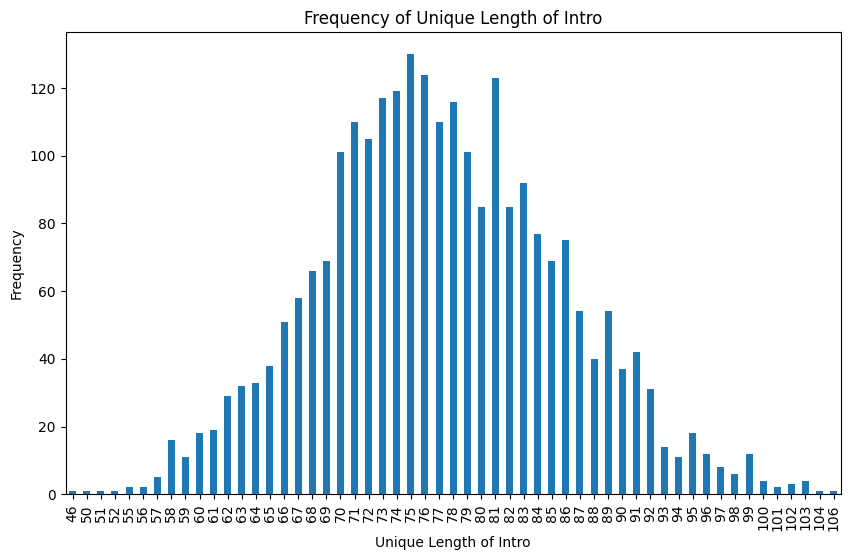

In [9]:
intro_counts = df["intro"].apply(len).value_counts().sort_index()
print_histogram(intro_counts, 'Frequency of Unique Length of Intro', 'Unique Length of Intro', 'Frequency')

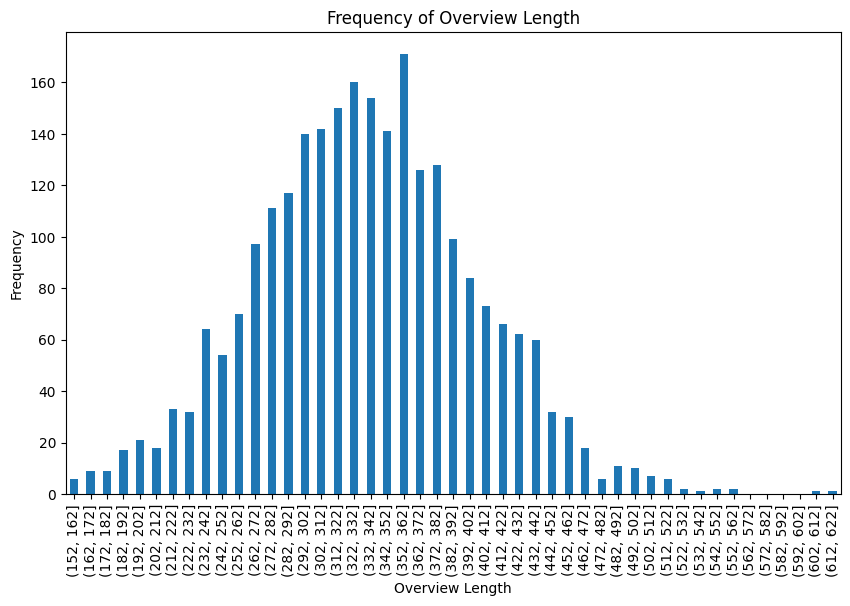

In [10]:
lengths = df['overview'].apply(len)
bins = range(lengths.min(), lengths.max() + 10, 10)  # Here, bins of size 50 characters
binned_lengths = pd.cut(lengths, bins)
overview_counts = binned_lengths.value_counts(sort=False)

print_histogram(overview_counts, 'Frequency of Overview Length', 'Overview Length', 'Frequency')

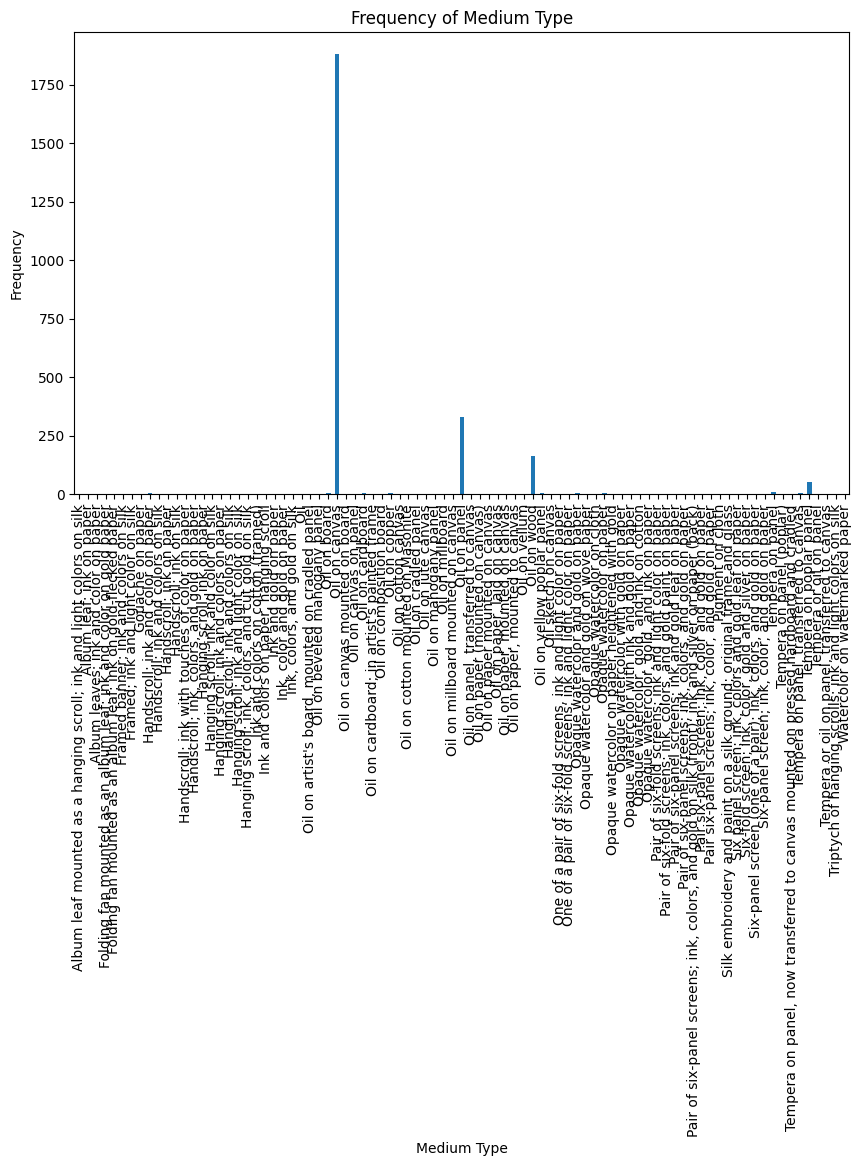

In [11]:
medium_counts = df["medium"].value_counts().sort_index()
print_histogram(medium_counts, 'Frequency of Medium Type', 'Medium Type', 'Frequency')

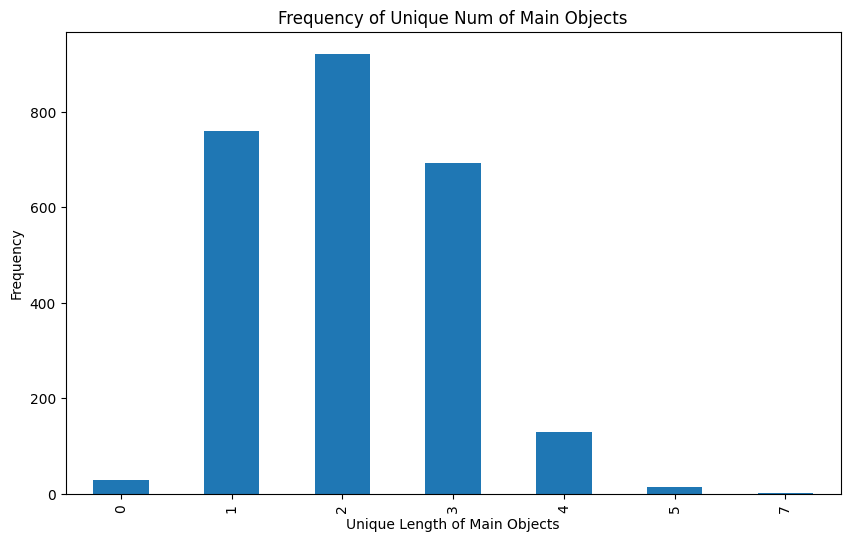

In [12]:
main_object_counts = df["main_objects"].apply(len).value_counts().sort_index()
print_histogram(main_object_counts, 'Frequency of Unique Num of Main Objects', 'Unique Length of Main Objects', 'Frequency')

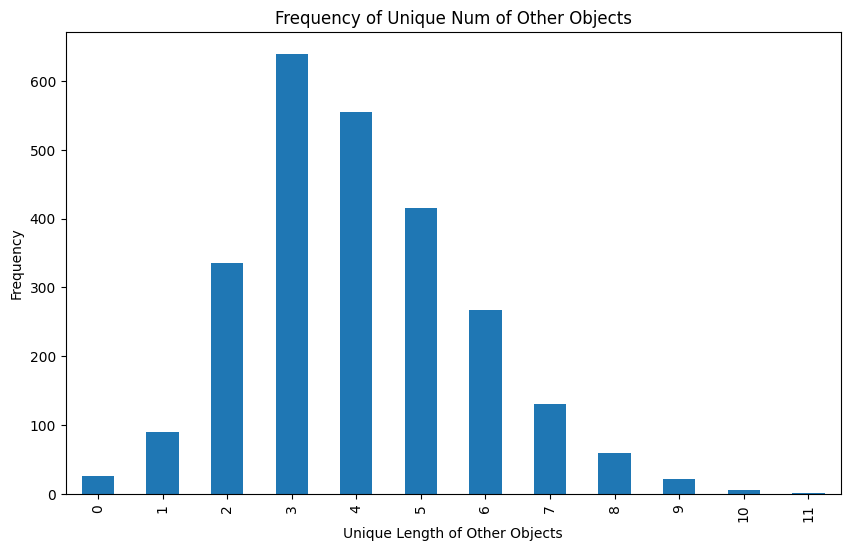

In [13]:
other_object_counts = df["other_objects"].apply(len).value_counts().sort_index()
print_histogram(other_object_counts, 'Frequency of Unique Num of Other Objects', 'Unique Length of Other Objects', 'Frequency')

In [14]:
df.dropna(subset=lit_columns, inplace=True)
print(df.shape)
df["object_tags"] = df.apply(
    lambda row: list(row["main_objects"].keys()) + row["other_objects"], axis=1
)

(2546, 17)


In [15]:
tags = []
for col in ["style_tags", "theme_tags", "object_tags", "movement"]:
    tmp = df[col].explode().reset_index(name="tag")
    tmp["type"] = col
    tags.append(tmp)

tags = pd.concat(tags).dropna()

In [16]:
tags

,index,tag,type
0,0,Dutch Golden Age,style_tags
1,0,Realism,style_tags
2,0,Chiaroscuro,style_tags
3,0,Genre Scene,style_tags
4,0,Domestic Life,style_tags
...,...,...,...
3423,2542,Neoclassicism,movement
3424,2542,Romanticism,movement
3425,2543,Impressionism,movement
3426,2544,Hudson River School,movement


In [17]:
tags = tags[~tags["tag"].str.contains(r"century|\d+", case=False)]
tags["tag"] = (
    tags["tag"]
    .str.lower()
    .replace("_", " ")
    .replace(
        r" (application|use|influence|art|painting|men|women|man|woman)$",
        "",
        regex=True,
    )
    .replace(r"impressionist(ic)?", "impressionism", regex=True)
    .replace(r"mannerist", "mannerism", regex=True)
    # .replace(r"(color palette|palette|tones)$", "color", regex=True)
    # .replace(r"portrait$", "portraiture", regex=True)
    .str.title()
)

/var/folders/2b/hfl7dqs919g7vkn35yf349xr0000gn/T/ipykernel_88708/3240065023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tags["tag"] = (


In [18]:
tags

,index,tag,type
0,0,Dutch Golden Age,style_tags
1,0,Realism,style_tags
2,0,Chiaroscuro,style_tags
3,0,Genre Scene,style_tags
4,0,Domestic Life,style_tags
...,...,...,...
3423,2542,Neoclassicism,movement
3424,2542,Romanticism,movement
3425,2543,Impressionism,movement
3426,2544,Hudson River School,movement


In [19]:
blacklist = [
        "Art",
        "Texture",
        "Textured",
        "Light",
        "Identity",
        "Beauty",
        "Brushwork",
        "Color",
        "Subject",
    ]

In [20]:
tags = tags[~tags["tag"].isin(blacklist)]
tags

,index,tag,type
0,0,Dutch Golden Age,style_tags
1,0,Realism,style_tags
2,0,Chiaroscuro,style_tags
3,0,Genre Scene,style_tags
4,0,Domestic Life,style_tags
...,...,...,...
3423,2542,Neoclassicism,movement
3424,2542,Romanticism,movement
3425,2543,Impressionism,movement
3426,2544,Hudson River School,movement


In [21]:
tag_counts = tags["tag"].value_counts().sort_values(ascending=False)
unique_tags = tag_counts.index.values

print(len(unique_tags))

9646


In [22]:
unique_tags[:10]

array(['Realism', 'Impressionism', 'Nature', 'Portraiture', 'Baroque',
       'Sky', 'Trees', 'Naturalism', 'Chiaroscuro', 'Landscape'],
      dtype=object)

In [23]:
tag_embeddings = np.load(os.path.join(DATA_DIR, "tag_embeddings.npy"))
tag_embeddings.shape

(9646, 1024)

In [24]:
def create_faiss_index(embeddings, index_path):
    index = faiss.IndexFlatIP(embeddings.shape[1])
    index.add(embeddings)
    faiss.write_index(index, index_path)

    return index

# Find the most related tags to a given tag
def search(query_embedding, index, k):
    D, I = index.search(query_embedding[None, :], k)
    return D, I

In [25]:
index_path = os.path.join(DATA_DIR, f"tag_e5.index")

In [26]:
index = create_faiss_index(tag_embeddings, index_path)

In [27]:
synonyms_list = []
scores_list = []
str_list = []
for tag_embed in tag_embeddings:
    D, I = search(tag_embed, index, 20)
    synonyms_list.append(unique_tags[I[0][1:]])
    scores_list.append(D[0][1:])
    str_list.append(
        ", ".join(unique_tags[i] + ":" + str(d) for d, i in zip(D[0], I[0]))
    )
print(len(synonyms_list))

9646


In [28]:
synonyms_list[:10]

[array(['Realistic', 'Naive Realism', 'Psychological Realism',
        'Realistic Style', 'Simplified Realism', 'Abstract Realism',
        'Abstract-Realism', 'Fantastic Realism', 'Vivid Realism',
        'Realist', 'Authenticity', 'American Realism',
        'Anatomical Realism', 'British Realism', 'Hyperrealism',
        'Dutch Realism', 'Soft Realism', 'Realistic Detail',
        'Social Realism'], dtype=object),
 array(['Impressionism Movement', 'Post-Impressionism',
        'Pre-Impressionism', 'Neo-Impressionism', 'Expressionism',
        'Surrealism', 'American Impressionism', 'Impressionism Background',
        'Impressionism Influences', 'Cubism', 'Impressionism Touches',
        'Impressionism Motif', 'Impressionism Tendencies',
        'Impressionism Precursor', 'Impressionism Color Theory',
        'Romanticism', 'Illusionism', 'Precursors To Impressionism',
        'Precursor To Impressionism'], dtype=object),
 array(['Natural', 'Natural Environment', 'Environment',
     

In [29]:
scores_list[:10]

[array([0.92420465, 0.9106988 , 0.90985096, 0.90823364, 0.9067373 ,
        0.90218765, 0.90183085, 0.9016444 , 0.8975265 , 0.8964832 ,
        0.89516807, 0.8948361 , 0.89401495, 0.89375156, 0.8937328 ,
        0.8897722 , 0.88937235, 0.8883414 , 0.8870967 ], dtype=float32),
 array([0.94787824, 0.9269772 , 0.9178622 , 0.91273737, 0.90958977,
        0.9043394 , 0.90191776, 0.90153563, 0.9001868 , 0.8958032 ,
        0.8931358 , 0.89286906, 0.8886362 , 0.8852495 , 0.88092256,
        0.87951946, 0.87502885, 0.8742341 , 0.871461  ], dtype=float32),
 array([0.9107253 , 0.8988955 , 0.89712596, 0.89136624, 0.8907391 ,
        0.8884599 , 0.884272  , 0.88067424, 0.88016987, 0.8771842 ,
        0.87697893, 0.87596303, 0.87496185, 0.8739861 , 0.87317467,
        0.87296414, 0.8704037 , 0.8701136 , 0.8693688 ], dtype=float32),
 array([0.9420478 , 0.93230295, 0.93172777, 0.9298476 , 0.9233973 ,
        0.92154765, 0.9195479 , 0.9155788 , 0.9145885 , 0.9130495 ,
        0.912298  , 0.9098786 , 0

In [30]:
tag_counts[:10]

tag
Realism          1629
Impressionism     774
Nature            716
Portraiture       589
Baroque           577
Sky               534
Trees             487
Naturalism        460
Chiaroscuro       377
Landscape         355
Name: count, dtype: int64

In [31]:
tag_counts_df = tag_counts.reset_index()
tag_counts_df["synonyms"] = str_list

In [32]:
tag_counts_df

,tag,count,synonyms
0,Realism,1629,"Realism:1.0, Realistic:0.92420465, Naive Reali..."
1,Impressionism,774,"Impressionism:1.0000001, Impressionism Movemen..."
2,Nature,716,"Nature:1.0, Natural:0.9107253, Natural Environ..."
3,Portraiture,589,"Portraiture:1.0, Female Portraiture:0.9420478,..."
4,Baroque,577,"Baroque:1.0000001, Early Baroque:0.93149203, B..."
...,...,...,...
9641,Sitting,1,"Sitting:0.99999994, Seated:0.9338306, Seating:..."
9642,Pillars,1,"Pillars:1.0000001, Pillar:0.9432995, Stone Pil..."
9643,Decorative Fabrics,1,"Decorative Fabrics:1.0000001, Decorative Garme..."
9644,Meeting Of Saint John The Baptist And Jesus,1,Meeting Of Saint John The Baptist And Jesus:1....


In [33]:
tag_counts_df.to_csv(os.path.join(DATA_DIR, "synonyms.csv"), index=False)

In [34]:
visited = set()
tag_mapping = dict()
for tag, synonyms, scores in zip(unique_tags, synonyms_list, scores_list):
    for curr_tag, curr_score in zip(synonyms, scores):
        if (
            curr_score > 0.95
            and tag_counts.loc[curr_tag] < 8
            and curr_tag not in visited
            and curr_tag != tag
            and curr_tag not in tag_mapping
        ):
            root_tag = tag
            while root_tag in tag_mapping:
                root_tag = tag_mapping[root_tag]
            tag_mapping[curr_tag] = root_tag
    visited.add(tag)

In [35]:
pd.DataFrame({"Source": tag_mapping.keys(), "Target": tag_mapping.values()}).to_csv(
    os.path.join(DATA_DIR, "tag_mapping.csv"), index=False
)

In [36]:
tags

,index,tag,type
0,0,Dutch Golden Age,style_tags
1,0,Realism,style_tags
2,0,Chiaroscuro,style_tags
3,0,Genre Scene,style_tags
4,0,Domestic Life,style_tags
...,...,...,...
3423,2542,Neoclassicism,movement
3424,2542,Romanticism,movement
3425,2543,Impressionism,movement
3426,2544,Hudson River School,movement


In [37]:
tag_mapping

{'Landscapes': 'Landscape',
 'Loose Brush Strokes': 'Loose Brushwork',
 'Tranquillity': 'Tranquility',
 'Light And Shadows': 'Light And Shadow',
 'Lighting And Shadow': 'Light And Shadow',
 'Shadow And Light': 'Light And Shadow',
 'Northern European Renaissance': 'Northern Renaissance',
 'Still-Life': 'Still Life',
 'Farm Life': 'Rural Life',
 'Fine Details': 'Fine Detail',
 'Fine Detailing': 'Fine Detail',
 'Tables': 'Table',
 'The Virgin Mary': 'Virgin Mary',
 'Historic': 'Historical',
 'Italian High Renaissance': 'High Renaissance',
 'American Classical Portraiture': 'American Portraiture',
 'American Portraits': 'American Portraiture',
 'American Colonial Portraiture': 'American Portraiture',
 'Subdued Color Tones': 'Subdued Palette',
 'Restrained Palette': 'Subdued Palette',
 'Early Italian Renaissance': 'Early Renaissance',
 'Dramatic Light': 'Dramatic Lighting',
 'Clothes': 'Clothing',
 'Strong Brushwork': 'Fine Brushwork',
 'Muted Hues': 'Muted Palette',
 'Vibrant Color': 'Vibr

In [38]:
len(tag_mapping.values()), len(set(tag_mapping.values()))

(800, 666)

In [39]:
tags["tag_replaced"] = tags["tag"].replace(tag_mapping)
tag_counts = tags["tag_replaced"].value_counts().sort_values(ascending=False)
# tag_counts.to_csv(os.path.join(DATA_DIR, "tags_replaced_count.csv"))

/var/folders/2b/hfl7dqs919g7vkn35yf349xr0000gn/T/ipykernel_88708/2290540107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tags["tag_replaced"] = tags["tag"].replace(tag_mapping)


In [40]:
tag_counts

tag_replaced
Realism                       1629
Impressionism                  774
Nature                         716
Portraiture                    589
Baroque                        577
                              ... 
Humanoid Figures                 1
Strange Structures               1
Severed Head Of Holofernes       1
Colosseum Ruins                  1
Chinese Botanical                1
Name: count, Length: 8846, dtype: int64

In [41]:
def get_type(x):
    s = set(x.values)
    for tag in ["movement", "style_tags"]:
        if tag in s:
            return tag
    return x.mode()[0]

In [42]:
tags

,index,tag,type,tag_replaced
0,0,Dutch Golden Age,style_tags,Dutch Golden Age
1,0,Realism,style_tags,Realism
2,0,Chiaroscuro,style_tags,Chiaroscuro
3,0,Genre Scene,style_tags,Genre Scene
4,0,Domestic Life,style_tags,Domestic Life
...,...,...,...,...
3423,2542,Neoclassicism,movement,Neoclassicism
3424,2542,Romanticism,movement,Romanticism
3425,2543,Impressionism,movement,Impressionism
3426,2544,Hudson River School,movement,Hudson River School


In [43]:
tags.apply(lambda x: x["tag"] == x["tag_replaced"], axis=1).sum()

46875

In [44]:
tags["replaced_flag"] = tags.apply(lambda x: x["tag"] == x["tag_replaced"], axis=1)

/var/folders/2b/hfl7dqs919g7vkn35yf349xr0000gn/T/ipykernel_88708/667593543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tags["replaced_flag"] = tags.apply(lambda x: x["tag"] == x["tag_replaced"], axis=1)


In [45]:
tags

,index,tag,type,tag_replaced,replaced_flag
0,0,Dutch Golden Age,style_tags,Dutch Golden Age,True
1,0,Realism,style_tags,Realism,True
2,0,Chiaroscuro,style_tags,Chiaroscuro,True
3,0,Genre Scene,style_tags,Genre Scene,True
4,0,Domestic Life,style_tags,Domestic Life,True
...,...,...,...,...,...
3423,2542,Neoclassicism,movement,Neoclassicism,True
3424,2542,Romanticism,movement,Romanticism,True
3425,2543,Impressionism,movement,Impressionism,True
3426,2544,Hudson River School,movement,Hudson River School,True


In [46]:
def get_replaced_ratio(x):
    return x.sum() / len(x)

In [47]:
replaced_ratios = tags.groupby("index")["replaced_flag"].agg(get_replaced_ratio).reset_index()

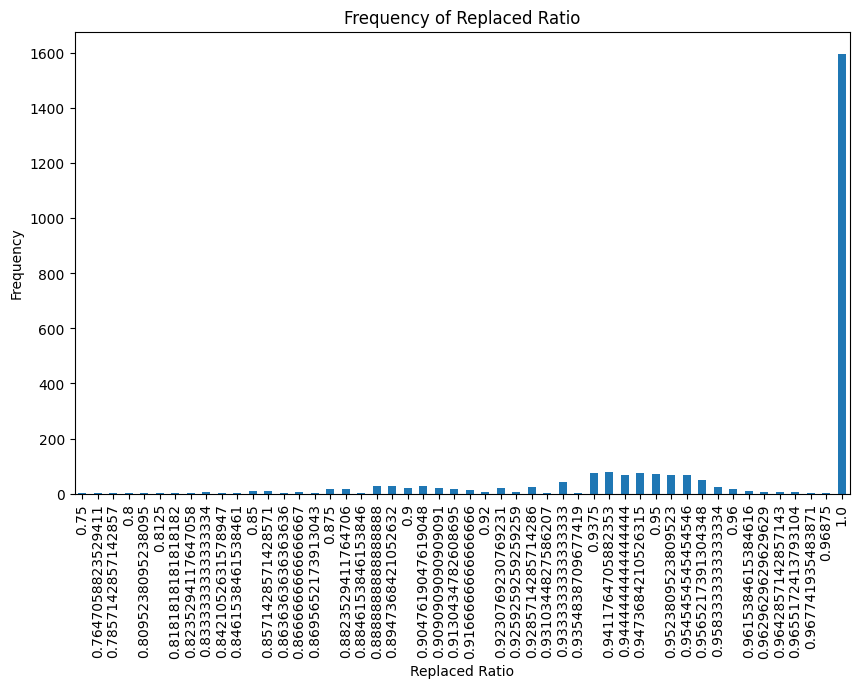

In [48]:
print_histogram(replaced_ratios["replaced_flag"].value_counts(), 'Frequency of Replaced Ratio', 'Replaced Ratio', 'Frequency')

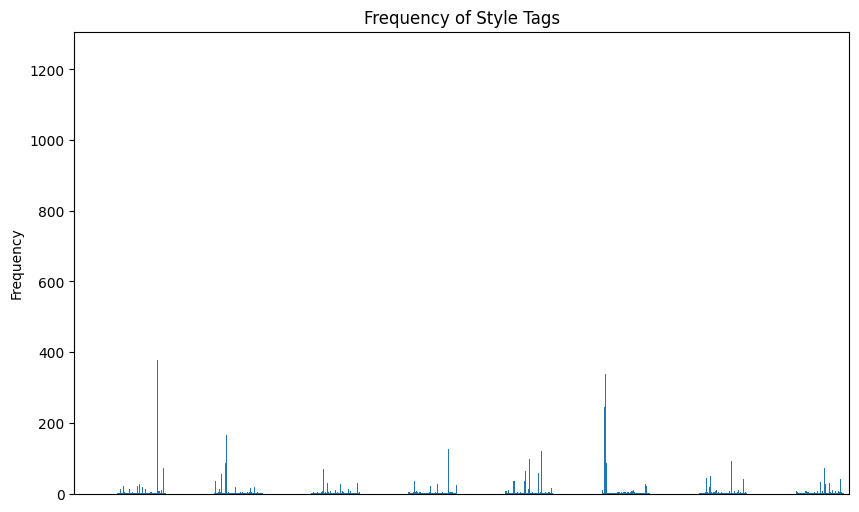

In [49]:
style_tags_count = tags[tags["type"] == "style_tags"]["tag_replaced"].value_counts()
print_histogram(style_tags_count, 'Frequency of Style Tags', 'Style Tags', 'Frequency', show_xaxis=False)

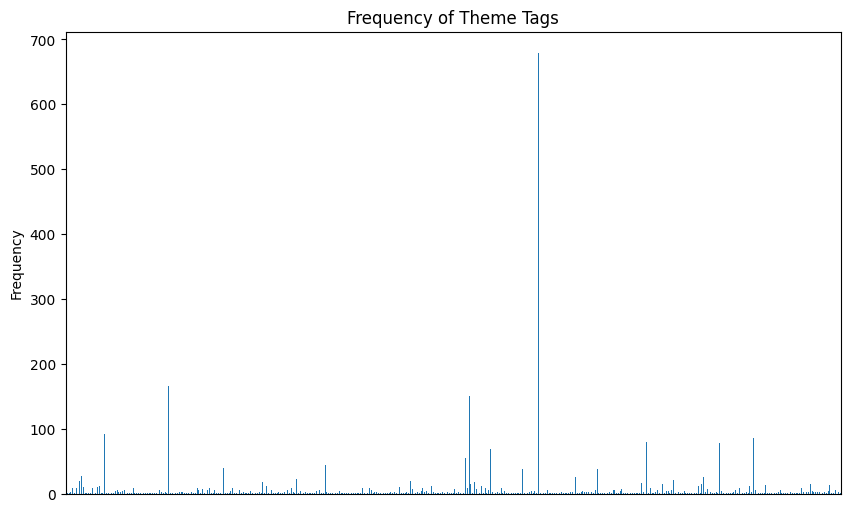

In [50]:
theme_tags_count = tags[tags["type"] == "theme_tags"]["tag_replaced"].value_counts()
print_histogram(theme_tags_count, 'Frequency of Theme Tags', 'Theme Tags', 'Frequency', show_xaxis=False)

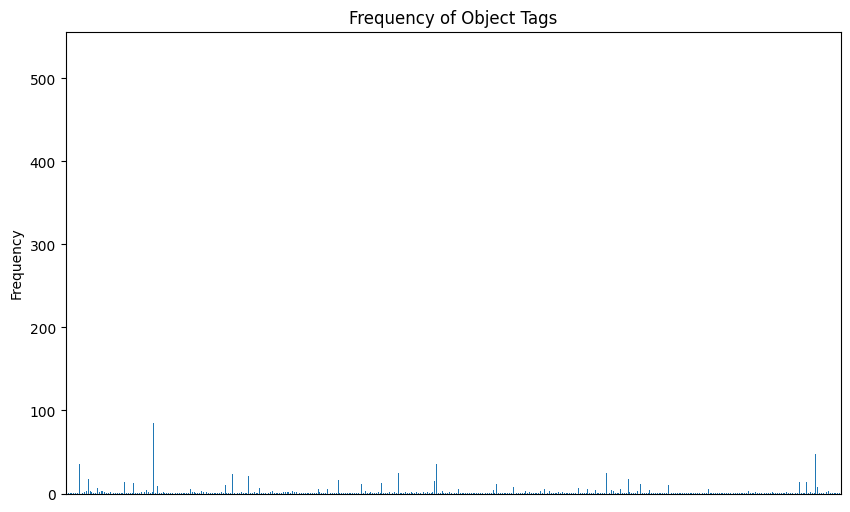

In [51]:
object_tags_count = tags[tags["type"] == "object_tags"]["tag_replaced"].value_counts()
print_histogram(object_tags_count, 'Frequency of Object Tags', 'Object Tags', 'Frequency', show_xaxis=False)

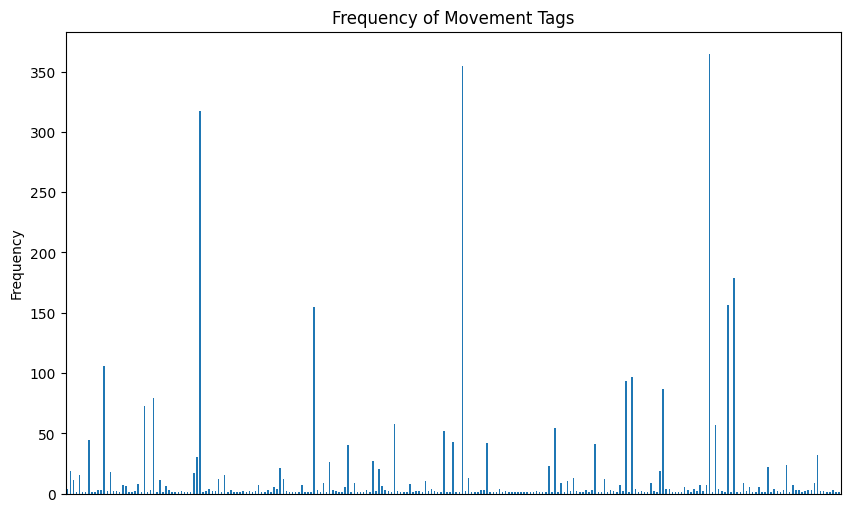

In [52]:
movement_tags_count = tags[tags["type"] == "movement"]["tag_replaced"].value_counts()
print_histogram(movement_tags_count, 'Frequency of Movement Tags', 'Movement Tags', 'Frequency', show_xaxis=False)

In [72]:
def get_type_counts(x):
    s = set(x.values)
    return len(s)

In [73]:
tag_type_counts = tags.groupby("tag_replaced")["type"].agg(get_type_counts).reset_index()
tag_type_counts

,tag_replaced,type
0,Aaron Baldwin,1
1,Abandoned Armor,1
2,Abandonment,1
3,Abduction,1
4,Abhisarika Nayika,1
...,...,...
8841,Zachariah Schoonmaker,1
8842,Zaleucus And His Son,1
8843,Zen Buddhism Inspired,1
8844,Zeus As A Bull,1


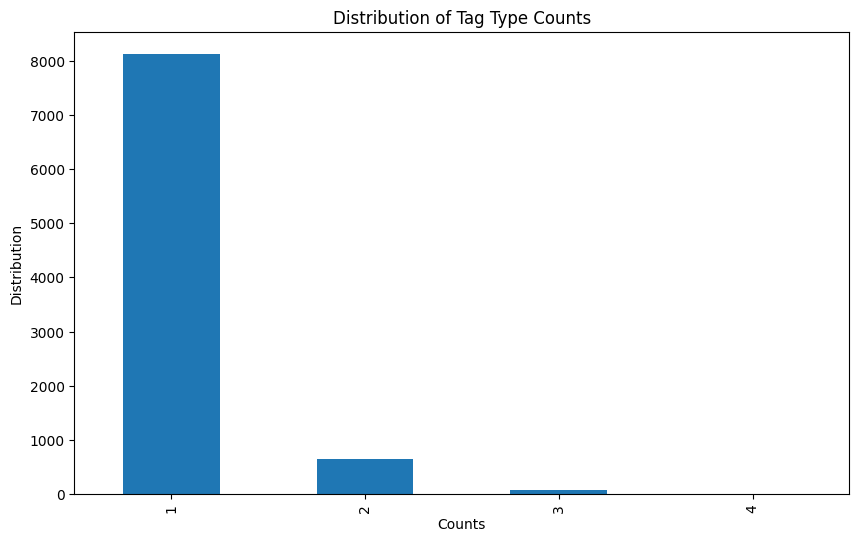

In [75]:
print_histogram(tag_type_counts["type"].value_counts(), 'Distribution of Tag Type Counts', 'Counts', 'Distribution')

In [53]:
tag_types = tags.groupby("tag_replaced")["type"].agg(get_type).reset_index()
tag_types

,tag_replaced,type
0,Aaron Baldwin,object_tags
1,Abandoned Armor,object_tags
2,Abandonment,theme_tags
3,Abduction,theme_tags
4,Abhisarika Nayika,object_tags
...,...,...
8841,Zachariah Schoonmaker,object_tags
8842,Zaleucus And His Son,object_tags
8843,Zen Buddhism Inspired,movement
8844,Zeus As A Bull,object_tags


In [54]:
tag_types["type"].value_counts()

type
object_tags    4946
theme_tags     2257
style_tags     1392
movement        251
Name: count, dtype: int64

In [55]:
tag_counts = tags["tag_replaced"].value_counts().sort_values(ascending=False).reset_index()
tag_counts

,tag_replaced,count
0,Realism,1629
1,Impressionism,774
2,Nature,716
3,Portraiture,589
4,Baroque,577
...,...,...
8841,Humanoid Figures,1
8842,Strange Structures,1
8843,Severed Head Of Holofernes,1
8844,Colosseum Ruins,1


In [56]:
tag_count_type = pd.merge(tag_counts, tag_types, on="tag_replaced")
print(len(tag_count_type))

8846


In [57]:
tag_count_type = tag_count_type[
    (tag_count_type["type"] == "style_tags") & (tag_count_type["count"] >= 8)
    | (tag_count_type["type"] == "theme_tags") & (tag_count_type["count"] >= 8)
    | (tag_count_type["type"] == "object_tags") & (tag_count_type["count"] >= 8)
    | (tag_count_type["type"] == "movement") & (tag_count_type["count"] >= 8)
]
print(len(tag_count_type))

929


In [58]:
tag_count_type

,tag_replaced,count,type
0,Realism,1629,movement
1,Impressionism,774,movement
2,Nature,716,style_tags
3,Portraiture,589,movement
4,Baroque,577,movement
...,...,...,...
924,Baby,8,object_tags
925,Mirror,8,object_tags
926,Patterned Carpet,8,object_tags
927,Nurturing,8,theme_tags


In [59]:
tag_count_type.rename(columns={"tag_replaced": "tag"}).to_csv(os.path.join(DATA_DIR, "tag_count_type.csv"), index=False)

In [60]:
tags

,index,tag,type,tag_replaced,replaced_flag
0,0,Dutch Golden Age,style_tags,Dutch Golden Age,True
1,0,Realism,style_tags,Realism,True
2,0,Chiaroscuro,style_tags,Chiaroscuro,True
3,0,Genre Scene,style_tags,Genre Scene,True
4,0,Domestic Life,style_tags,Domestic Life,True
...,...,...,...,...,...
3423,2542,Neoclassicism,movement,Neoclassicism,True
3424,2542,Romanticism,movement,Romanticism,True
3425,2543,Impressionism,movement,Impressionism,True
3426,2544,Hudson River School,movement,Hudson River School,True


In [62]:
tag_count_type

,tag_replaced,count,type
0,Realism,1629,movement
1,Impressionism,774,movement
2,Nature,716,style_tags
3,Portraiture,589,movement
4,Baroque,577,movement
...,...,...,...
924,Baby,8,object_tags
925,Mirror,8,object_tags
926,Patterned Carpet,8,object_tags
927,Nurturing,8,theme_tags


In [63]:
print(len(tags))
new_tags = tags[tags["tag_replaced"].isin(tag_count_type["tag_replaced"])]
print(len(new_tags))
new_tags.to_csv(os.path.join(DATA_DIR, "tags.csv"), index=False)

48118
34784


In [64]:
for col in [
    "style_tags",
    "theme_tags",
    "object_tags",
    "movement",
]:
    tag_counts = tag_count_type[tag_count_type["type"] == col].to_csv(
        os.path.join(DATA_DIR, col + ".csv"), index=False
    )

In [66]:
new_tags = new_tags.groupby("index")["tag"].agg(list)
new_tags

index
0       [Dutch Golden Age, Realism, Chiaroscuro, Genre...
1       [Early Renaissance, Realism, Portrait, Attenti...
2       [Baroque, Portraiture, Realism, Nobility, Stat...
3       [Northern Renaissance, Realism, Portraiture, D...
4       [Northern Renaissance, Realism, Chiaroscuro, P...
                              ...                        
2541    [Italian Renaissance, Chiaroscuro, Realism, De...
2542    [Neoclassical, Realism, Romantic, Dramatic, De...
2543    [Impressionism, Brushstrokes, Natural Light, V...
2544    [Realism, Fine Detail, Naturalism, Luminism, S...
2545    [Realism, Still Life, Contrast, Simplicity, Na...
Name: tag, Length: 2546, dtype: object

In [68]:
df_new = df.join(new_tags)
df_new

,title,artist_display,date_display,date_start,date_end,medium,image_id,url,intro,overview,style,style_tags,theme,theme_tags,main_objects,other_objects,movement,object_tags,tag
0,An Old Woman Dozing over a Book,"Nicolaes Maes (Dutch, 1634-1693)",c. 1655,1655.0,1655.0,Oil on canvas,NGA-c5f5cfa6-6150-435a-bf5d-a0a7a55c52f7,https://api.nga.gov/iiif/c5f5cfa6-6150-435a-bf...,"A serene portrayal of repose, the subject succ...",The artwork captures a domestic scene featurin...,This painting exhibits characteristics of Dutc...,"[Dutch Golden Age, Realism, Chiaroscuro, Genre...",The theme of this artwork is the portrayal of ...,"[Everyday Life, Aging, Rest, Domestic Scene, L...",{'Old Woman': 'The central figure of the paint...,"[table, keys]",[Dutch Golden Age],"[Old Woman, Book, table, keys]","[Dutch Golden Age, Realism, Chiaroscuro, Genre..."
1,Profile Portrait of a Lady,Franco-Flemish 15th Century,c. 1410,1410.0,1410.0,Oil on panel,NGA-82e62b74-1316-4ed3-9bf2-504e3939edec,https://api.nga.gov/iiif/82e62b74-1316-4ed3-9b...,A serene noblewoman depicted in a detailed pro...,"The painting is a profile portrait of a lady, ...",This portrait exhibits the precision and atten...,"[Franco-Flemish, Early Renaissance, Realism, P...","The artwork conveys themes of nobility, fashio...","[Nobility, Fashion, Societal Status, 15th Cent...",{'Lady': 'A noblewoman portrayed with an expre...,"[Headdress, Garment, Collar]","[Northern Renaissance, Early Netherlandish]","[Lady, Headdress, Garment, Collar]","[Early Renaissance, Realism, Portrait, Attenti..."
2,"Henry, Duke of Gloucester","Adriaen Hanneman (Dutch, c. 1603/1604-1671)",c. 1653,1653.0,1653.0,Oil on canvas,NGA-51c903d0-02a1-404b-bf92-1e3942c02fef,https://api.nga.gov/iiif/51c903d0-02a1-404b-bf...,A dignified portrait of a youthful noble again...,"This is a portrait of a young male aristocrat,...","The artwork is painted in the Baroque style, n...","[Baroque, Portraiture, Realism, 17th Century]",The theme of this artwork revolves around nobi...,"[Nobility, Status, Youth, Aristocracy, Elegance]",{'The Duke of Gloucester': 'A young nobleman s...,"[Rock formation, Cloudy sky, Cane]",[Baroque],"[The Duke of Gloucester, Rock formation, Cloud...","[Baroque, Portraiture, Realism, Nobility, Stat..."
3,Portrait of a Man with an Arrow,"Hans Memling (Netherlandish, active c. 1465-1494)",c. 1470/1475,1470.0,1475.0,Oil on panel,NGA-8835af10-db33-41e3-8684-4fc3117c2a15,https://api.nga.gov/iiif/8835af10-db33-41e3-86...,"A serene portrayal of a man holding an arrow, ...",The portrait features a young man with introsp...,The painting typifies the Northern Renaissance...,"[Northern Renaissance, Realism, Portraiture, D...",This artwork serves as a quintessential exampl...,"[Renaissance Portraiture, Individuality, Intro...",{'Man': 'A young man with thoughtful eyes and ...,"[black cap, dark red clothing, white shirt, go...",[Northern Renaissance],"[Man, Arrow, black cap, dark red clothing, whi...","[Northern Renaissance, Realism, Portraiture, D..."
4,Portrait of a Gentleman,"Antonis Mor (Netherlandish, 1519-1576)",1569,1569.0,1569.0,Oil on canvas,NGA-2b2c95ba-68bc-4a33-a23e-878bc480e874,https://api.nga.gov/iiif/2b2c95ba-68bc-4a33-a2...,A dignified portrayal of a nobleman with his l...,The painting captures a standing gentleman dre...,Antonis Mor paints in a Northern Renaissance s...,"[Northern Renaissance, Realism, Chiaroscuro, P...",The theme revolves around aristocracy and stat...,"[Aristocracy, Status, Wealth, Power, Fidelity,...",{'Gentleman': 'The central figure is a well-dr...,"[Golden chain, Sword, Ruff, Cape, Gloves]",[Northern Renaissance],"[Gentleman, Dog, Golden chain, Sword, Ruff, Ca...","[Northern Renaissance, Realism, Chiaroscuro, P..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,Virgin and Child Enthroned,"Girolamo da Santacroce (Italian, fl. 1503, d. ...",1516,1516.0,1516.0,"Tempera or oil on panel, transferred to canvas",ARTIC-9cabe627-598a-e86f-5f10-456e5e49

In [69]:
df_new.rename(columns={"tag": "tags"}, inplace=True)
df_new["tags"] = df_new["tags"].apply(lambda x: x if isinstance(x, list) else [])

In [70]:
df_new.to_csv(os.path.join(DATA_DIR, "tags_replaced.csv"))